## Initial settings

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = f"{5}"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib

import sys
sys.path.append("..")
import tools as t


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

2024-06-18 14:18:55.375539: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow import keras
import tensorflow as tf

In [4]:
root_path = "/home/dg321/gitTest/PRI/irp/Ventilation/24-01"

## Load data

In [5]:
rawdata = pd.read_csv(root_path + "/healthy data_3.0 zyshu.csv")

In [6]:
print(rawdata.shape)
print(rawdata.columns)
print(rawdata.head())

(99, 15)
Index(['Temp°C', 'Humidity%', 'PM1.0', 'PM2.5', 'PM10', 'CO2', 'Formaldehyde',
       'TVOC', 'FeNO50(ppm)', 'FeNO200', 'CaNO', 'eCO', 'FVC', 'FEV1', 'PEF'],
      dtype='object')
   Temp°C  Humidity%  PM1.0  PM2.5  PM10  CO2  Formaldehyde   TVOC  \
0  18.726     56.756      9     17    21  561           0.0  0.186   
1  18.726     56.968      8     12    17  575           0.0  0.170   
2  18.774     58.527     11     18    25  605           0.0  0.162   
3  18.798     59.790     16     20    28  614           0.0  0.152   
4  18.774     60.230     11     15    22  622           0.0  0.146   

   FeNO50(ppm)  FeNO200  CaNO  eCO   FVC  FEV1   PEF  
0        10.00      2.0  0.54  0.7  1.18  0.87  1.58  
1         1.25      3.0  2.00  4.5  1.67  1.45  3.24  
2        10.00      2.0  0.70  1.2  0.75  1.39  1.97  
3         7.00      3.0  1.20  6.3  1.47  1.09  3.60  
4         3.00      2.0  1.60  1.0  1.56  1.36  2.87  


In [7]:
print(rawdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp°C        99 non-null     float64
 1   Humidity%     99 non-null     float64
 2   PM1.0         99 non-null     int64  
 3   PM2.5         99 non-null     int64  
 4   PM10          99 non-null     int64  
 5   CO2           99 non-null     int64  
 6   Formaldehyde  99 non-null     float64
 7   TVOC          99 non-null     float64
 8   FeNO50(ppm)   99 non-null     float64
 9   FeNO200       99 non-null     float64
 10  CaNO          99 non-null     float64
 11  eCO           99 non-null     float64
 12  FVC           99 non-null     float64
 13  FEV1          99 non-null     float64
 14  PEF           99 non-null     float64
dtypes: float64(11), int64(4)
memory usage: 11.7 KB
None


In [8]:
column_names_list = rawdata.columns.tolist()

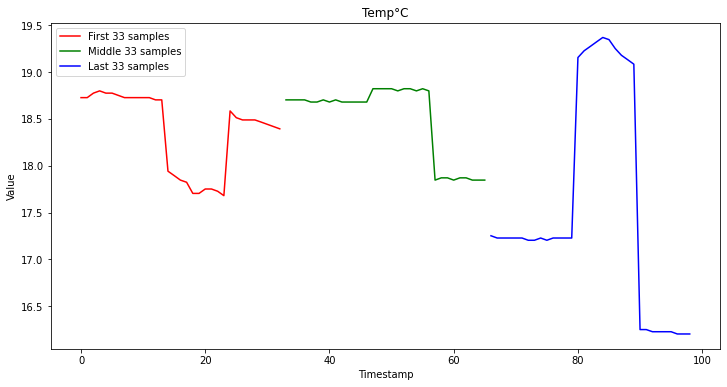

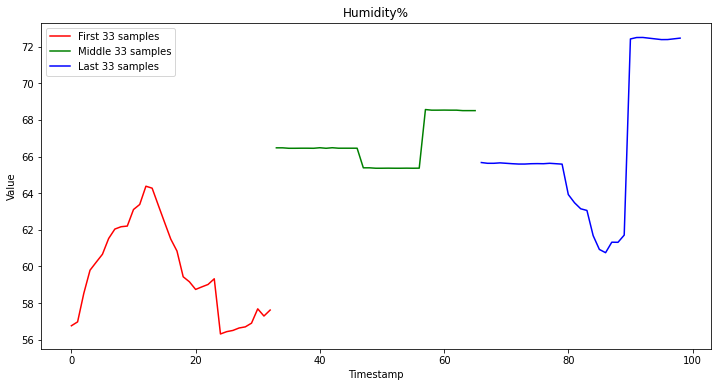

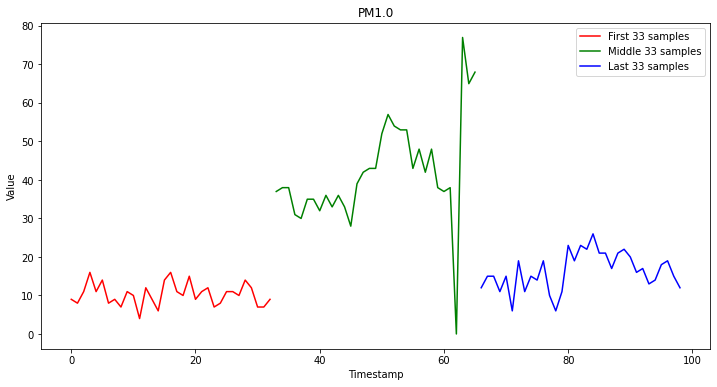

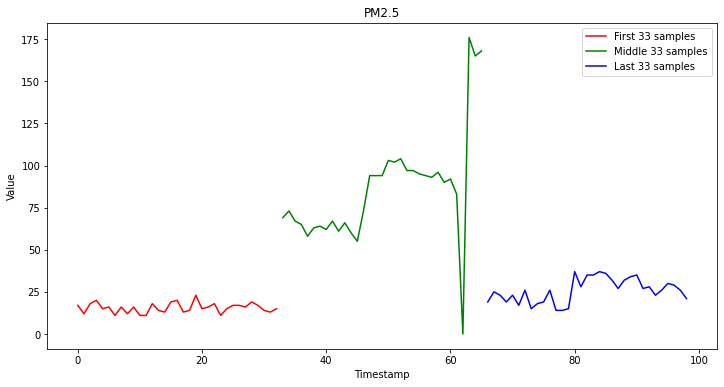

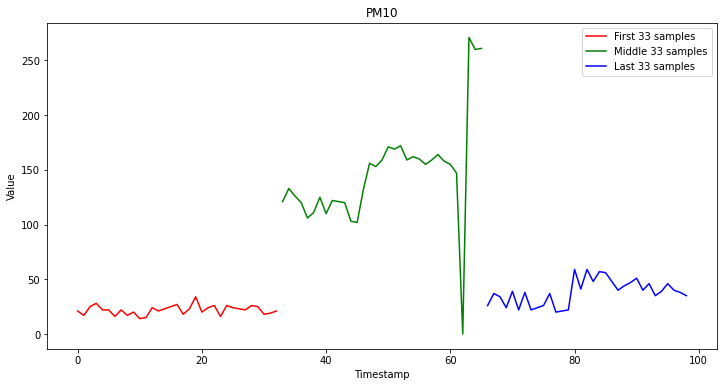

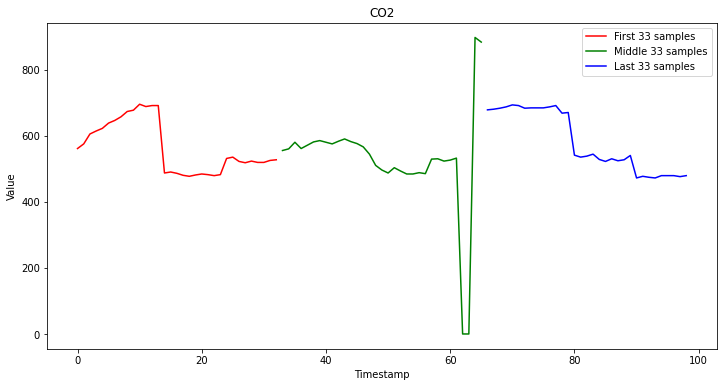

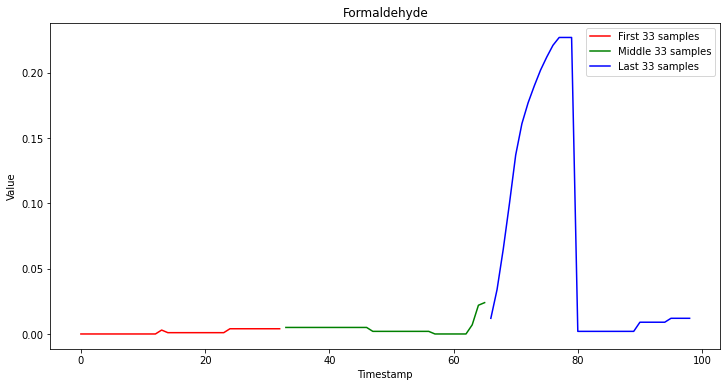

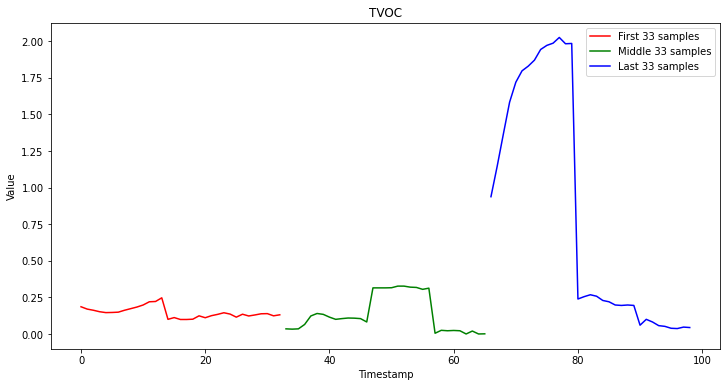

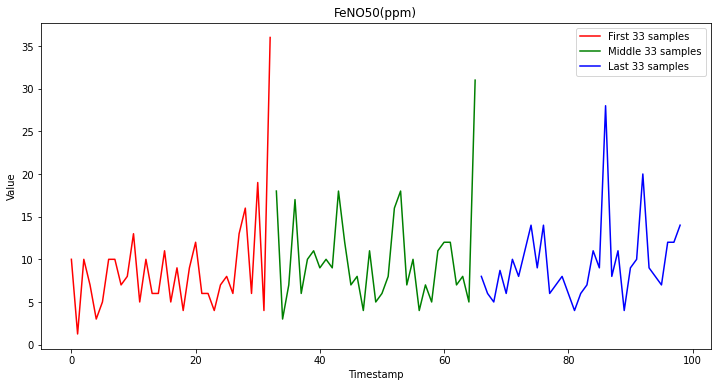

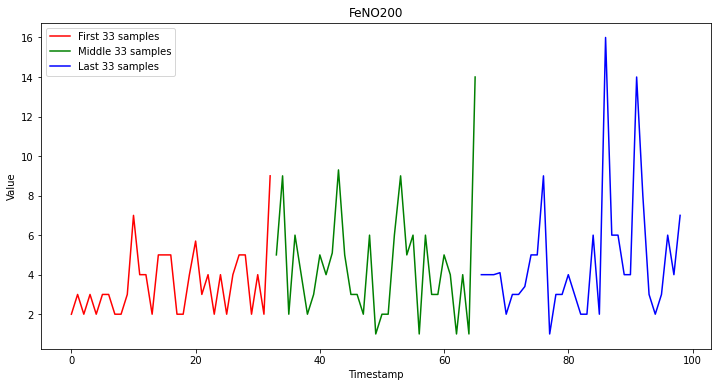

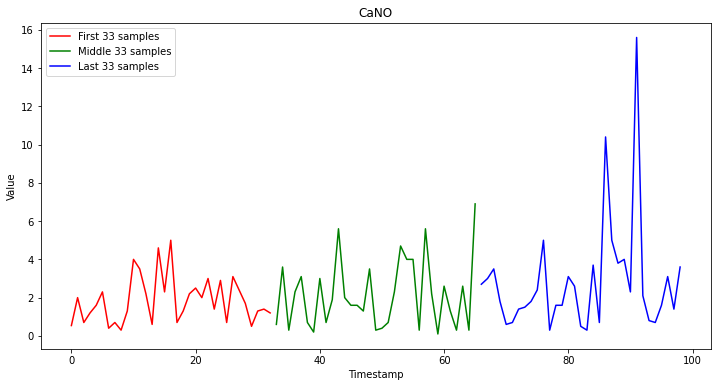

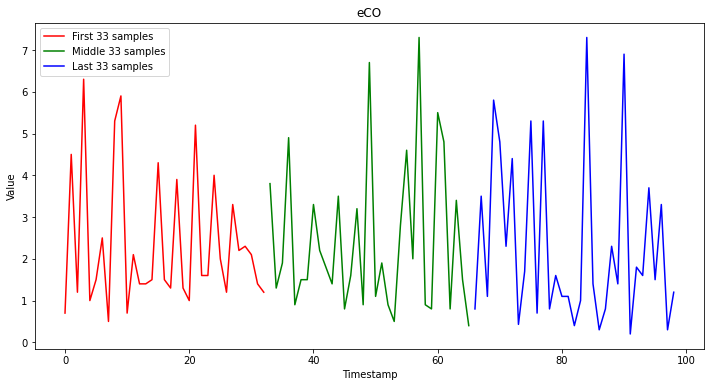

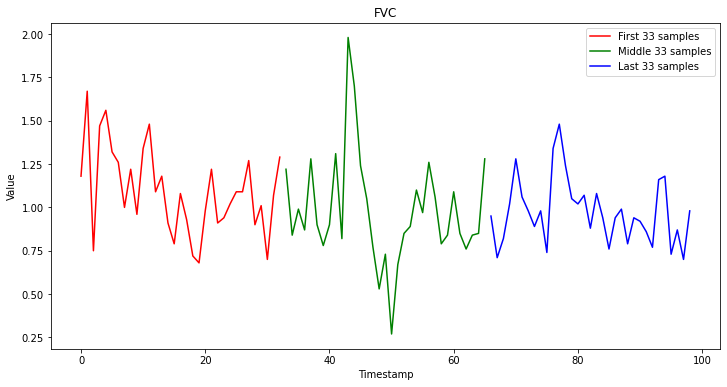

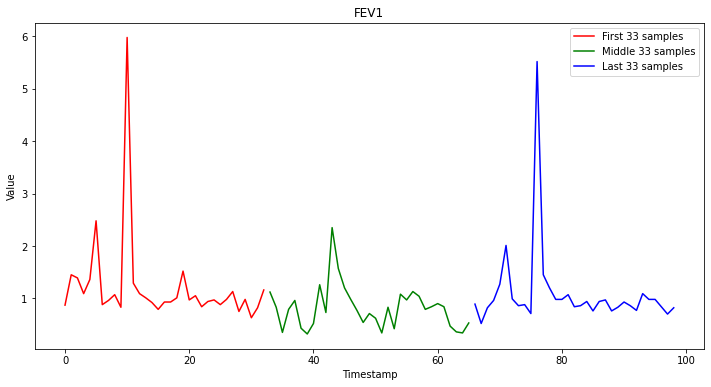

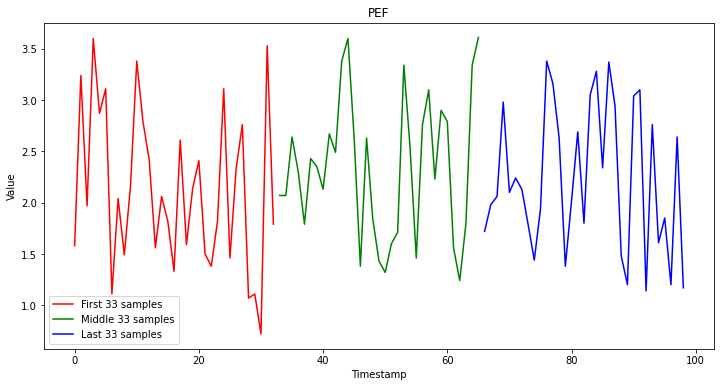

In [9]:
# Plot data over the whole time period

for i in range(rawdata.shape[1]):
    plt.figure(figsize=(12, 6))
    
    # Split the data into three parts
    first_part = rawdata.iloc[:33, i]
    middle_part = rawdata.iloc[33:66, i]
    last_part = rawdata.iloc[66:, i]

    # Plot each part with a different color
    plt.plot(first_part, 'r', label='First 33 samples')
    plt.plot(middle_part, 'g', label='Middle 33 samples')
    plt.plot(last_part, 'b', label='Last 33 samples')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(column_names_list[i])
    plt.legend()
    plt.show()

## Preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler
import joblib

data_reducedcols = rawdata

# Standardize the dataset
scaler = MinMaxScaler()

# Scale the data
scaled_data = scaler.fit_transform(data_reducedcols)

# Save the scaler object
joblib.dump(scaler, root_path + '/scaler.pkl')



['/home/dg321/gitTest/PRI/irp/Ventilation/24-01/scaler.pkl']

In [12]:
# Choose the first 80% samples as training data
train_samples = int(len(scaled_data) * 0.8)
data_train = scaled_data[:train_samples]
data_test = scaled_data[train_samples:]

train_samples_2 = int(len(data_train) * 0.9)
data_val = data_train[train_samples_2:]
train_data = data_train[:train_samples_2]

In [13]:
print("Training Set Shape:", data_train.shape)
print("Validation Set Shape:", data_val.shape)
print("Test Set Shape:", data_test.shape)


Training Set Shape: (79, 15)
Validation Set Shape: (8, 15)
Test Set Shape: (20, 15)


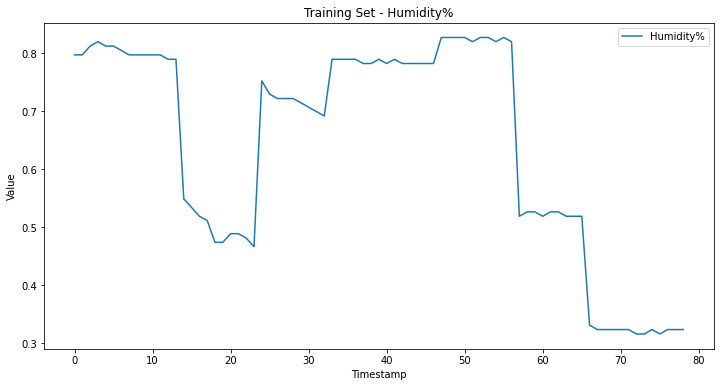

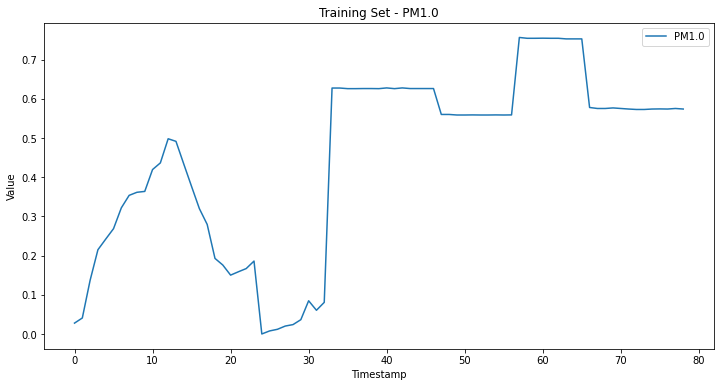

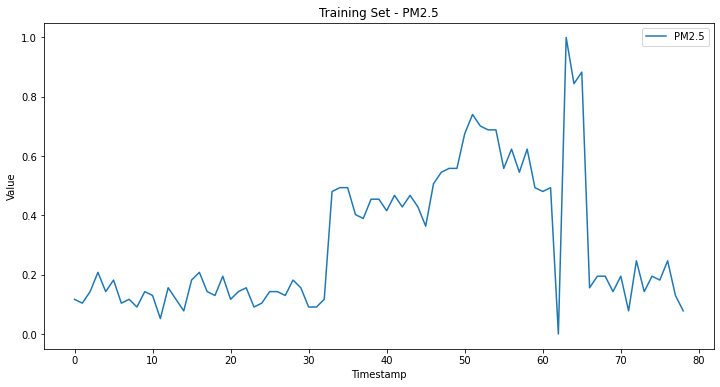

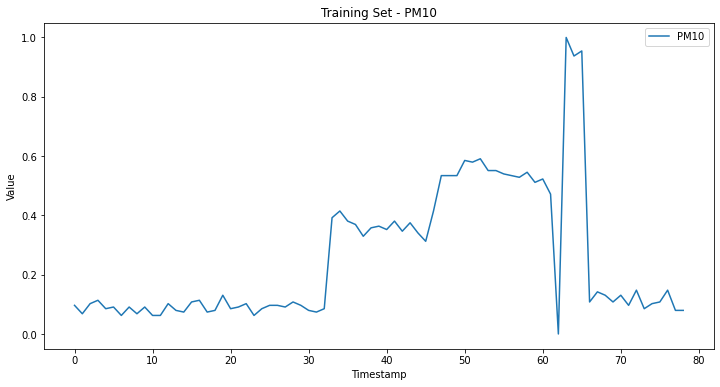

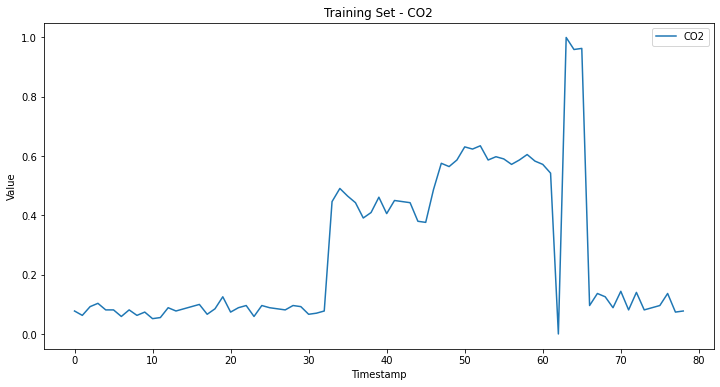

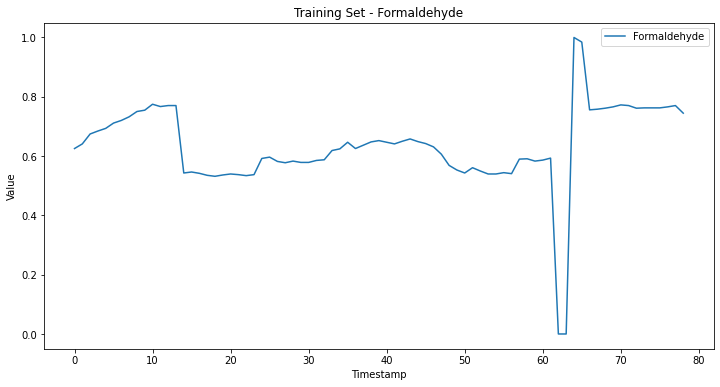

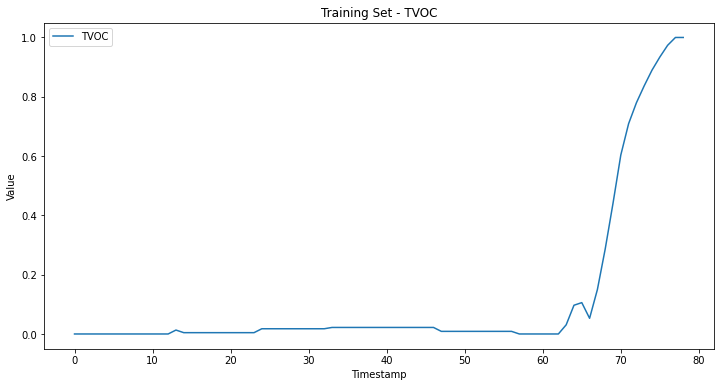

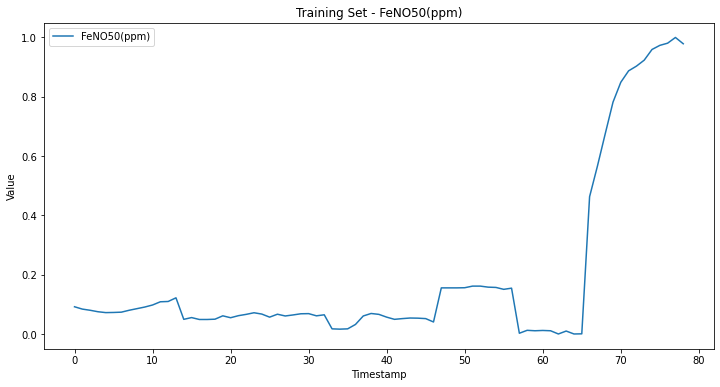

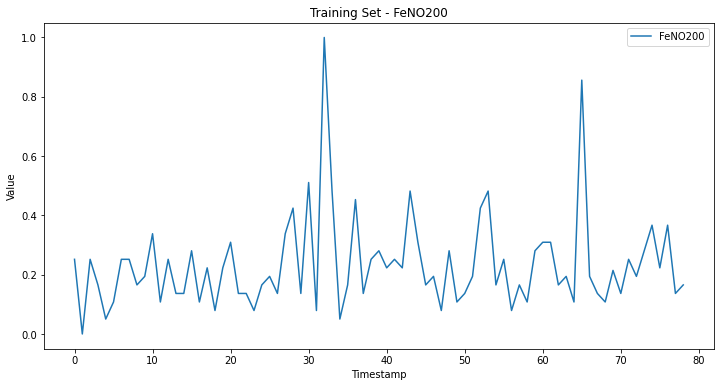

In [14]:
# Plot the first 3 columns for the training set
for i in range(9):
    plt.figure(figsize=(12, 6))
    plt.plot(data_train[:, i], label=column_names_list[i+1])
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(f'Training Set - {column_names_list[i+1]}')
    plt.legend()
    plt.show()

# # Plot the first 3 columns for the validation set
# for i in range(3):
#     plt.figure(figsize=(12, 6))
#     plt.plot(data_val[:, i], label=column_names_list[i+1])
#     plt.xlabel('Timestamp')
#     plt.ylabel('Value')
#     plt.title(f'Validation Set - {column_names_list[i+1]}')
#     plt.legend()
#     plt.show()

# # Plot the first 3 columns for the test set
# for i in range(3):
#     plt.figure(figsize=(12, 6))
#     plt.plot(data_test[:, i], label=column_names_list[i+1])
#     plt.xlabel('Timestamp')
#     plt.ylabel('Value')
#     plt.title(f'Test Set - {column_names_list[i+1]}')
#     plt.legend()
#     plt.show()


## Create dataset and dataloader

In [15]:
all_values = data_train
ncoeffs = data_train.shape[1]
print(ncoeffs)
ntimes = 8
BATCH_SIZE = 8
step = 1

15


In [16]:
train_ct = t.concat_timesteps(all_values, ntimes, step)
val_ct = t.concat_timesteps(data_val, ntimes, step)
test_ct = t.concat_timesteps(data_test, ntimes, step)

In [17]:
print("Type of train_ct: ", type(train_ct))
print("Shape of train_ct: ", train_ct.shape)

Type of train_ct:  <class 'numpy.ndarray'>
Shape of train_ct:  (71, 8, 15)


In [18]:
from torch.utils.data import TensorDataset, DataLoader
import torch

# create dataset
# Convert numpy arrays to PyTorch tensors
train_ct_torch = torch.from_numpy(train_ct).float()
val_ct_torch = torch.from_numpy(val_ct).float()

# Create TensorDatasets
train_dataset = TensorDataset(train_ct_torch)
val_dataset = TensorDataset(val_ct_torch)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

/home/dg321/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


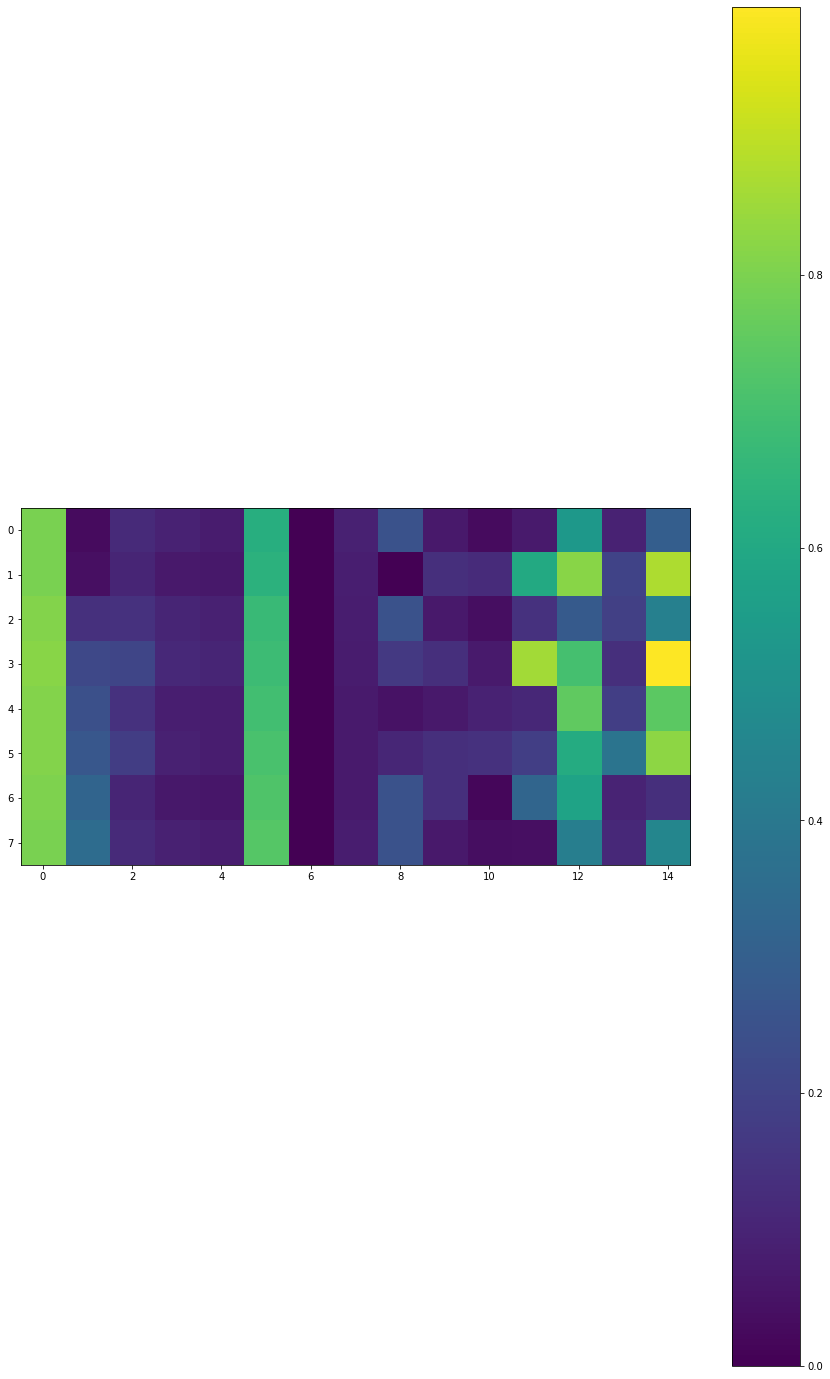

In [19]:
plt.figure(figsize=(15,25))
# Call next() function and get the first element of the tuple
img = next(iter(train_loader))[0][0,:,:]
plt.imshow(img)
plt.colorbar()

## LSTM

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

import wandb

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
from copy import deepcopy as dc

end_index = 15

train_ct_fliped = dc(np.flip(train_ct[:,:7, :end_index], axis=1))
test_ct_fliped = dc(np.flip(test_ct[:,:7, :end_index], axis=1))


In [23]:
X_train = torch.tensor(train_ct_fliped).float()
y_train = torch.tensor(train_ct[:,7:, :end_index]).float().squeeze(1)
X_test = torch.tensor(test_ct_fliped).float()
y_test = torch.tensor(test_ct[:,7:, :end_index]).float().squeeze(1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([71, 7, 15]),
 torch.Size([12, 7, 15]),
 torch.Size([71, 15]),
 torch.Size([12, 15]))

In [24]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [25]:
batch_size = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [26]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([4, 7, 15]) torch.Size([4, 15])


In [27]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, end_index)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(end_index, 4, 1)
model.to(device)
model


LSTM(
  (lstm): LSTM(15, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=15, bias=True)
)

In [43]:
# Initialize a new run
wandb.init(project="Health - LSTM", name="my_run")

learning_rate = 0.005
num_epochs = 2000
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping parameters
patience = 2000
best_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0

    # Training phase
    model.train()
    for batch in train_loader:
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        optimizer.zero_grad()
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            val_loss += loss.item()

    # Calculate average losses
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(test_loader)

    # Check if early stopping condition is met
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print('Early stopping!')
            break

    # Log the losses
    wandb.log({"Train Loss": avg_train_loss, "Validation Loss": avg_val_loss})

    # Print the losses
    print(f'Epoch: {epoch + 1}, Train Loss: {avg_train_loss:.3f}, Val Loss: {avg_val_loss:.3f}')

# Save the model
torch.save(model.state_dict(), "model.pth")
wandb.save("model.pth")

Train Loss,█▆▅█▅▆▅▄▄▄▄▅▃▄▄▄▂▃▃▃▂▂▂▃▂▂▂▂▂▂▁▂▃▁▁▃▁▂▂▂
Validation Loss,▁▃▃▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▇▅▇▅▆▆▆▇▅▆▆▇▇█▇
Train Loss,0.0169
Validation Loss,0.09625


2024-03-24 12:09:05.592471: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Epoch: 1, Train Loss: 0.018, Val Loss: 0.093
Epoch: 2, Train Loss: 0.017, Val Loss: 0.097
Epoch: 3, Train Loss: 0.017, Val Loss: 0.093
Epoch: 4, Train Loss: 0.016, Val Loss: 0.097
Epoch: 5, Train Loss: 0.017, Val Loss: 0.095
Epoch: 6, Train Loss: 0.016, Val Loss: 0.095
Epoch: 7, Train Loss: 0.017, Val Loss: 0.098
Epoch: 8, Train Loss: 0.016, Val Loss: 0.096
Epoch: 9, Train Loss: 0.017, Val Loss: 0.102
Epoch: 10, Train Loss: 0.017, Val Loss: 0.093
Epoch: 11, Train Loss: 0.017, Val Loss: 0.100
Epoch: 12, Train Loss: 0.017, Val Loss: 0.098
Epoch: 13, Train Loss: 0.016, Val Loss: 0.099
Epoch: 14, Train Loss: 0.016, Val Loss: 0.097
Epoch: 15, Train Loss: 0.016, Val Loss: 0.096
Epoch: 16, Train Loss: 0.016, Val Loss: 0.100
Epoch: 17, Train Loss: 0.017, Val Loss: 0.100
Epoch: 18, Train Loss: 0.016, Val Loss: 0.095
Epoch: 19, Train Loss: 0.016, Val Loss: 0.096
Epoch: 20, Train Loss: 0.016, Val Loss: 0.099
Epoch: 21, Train Loss: 0.016, Val Loss: 0.093
Epoch: 22, Train Loss: 0.016, Val Loss: 0.0

KeyboardInterrupt: 

In [47]:
# Save the model
model_path = os.path.join(wandb.run.dir, "model.pth")
torch.save(model.state_dict(), model_path)
wandb.save("model.pth")

['/data/dg321/gitTest/PRI/irp/Ventilation/24-01/wandb/run-20240324_120859-31x9vxs1/files/model.pth',
 '/data/dg321/gitTest/PRI/irp/Ventilation/24-01/wandb/run-20240324_120859-31x9vxs1/files/model.pth']

### Load trained model

In [49]:
# run = wandb.init()

# artifact = run.use_artifact('guodh/compression - Containing kernel size 3/model:v8', type='model')

# artifact_dir = artifact.download()

# Load the model
model = LSTM(end_index, 4, 1)

# # Load the model state dictionary from the downloaded artifact
# model.load_state_dict(torch.load(os.path.join(artifact_dir, "model.pth")))

# Load the model
model_path = os.path.join(wandb.run.dir, "model.pth")
model.load_state_dict(torch.load(model_path))
model.to(device)

LSTM(
  (lstm): LSTM(15, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=15, bias=True)
)

### Predict

torch.Size([71, 15])
(71, 15)


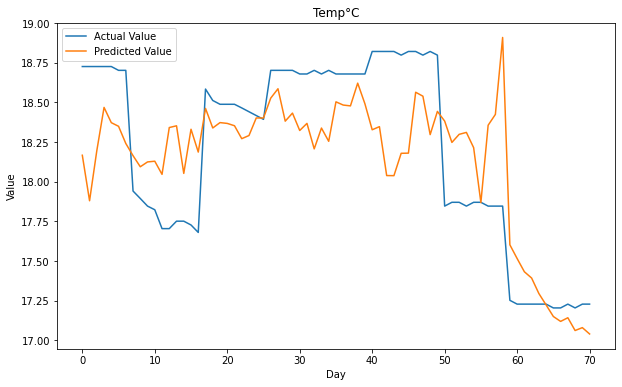

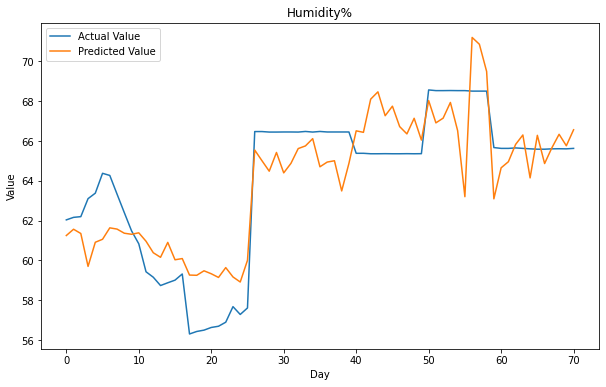

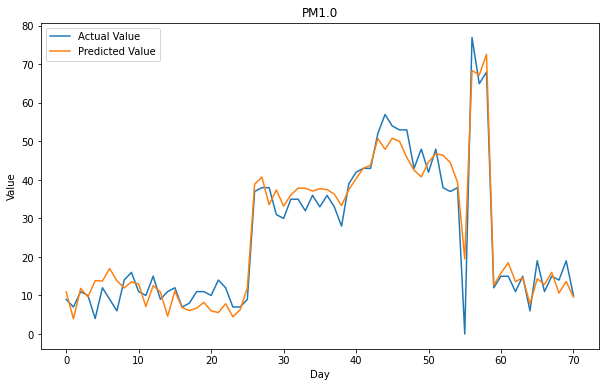

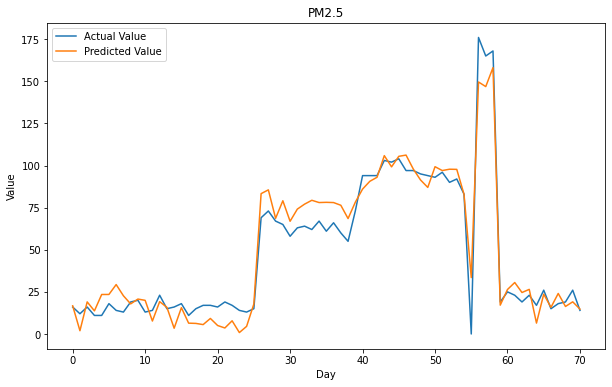

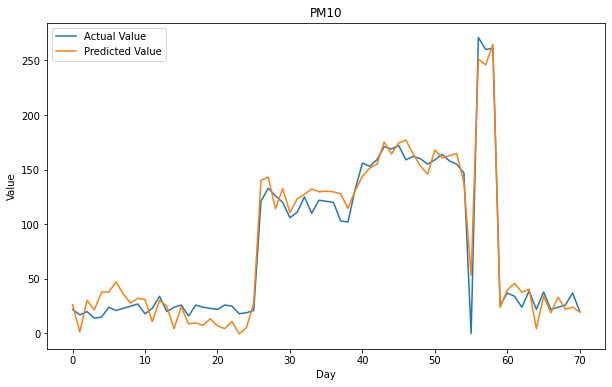

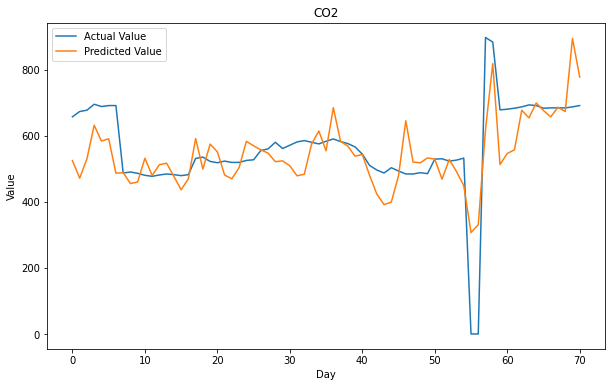

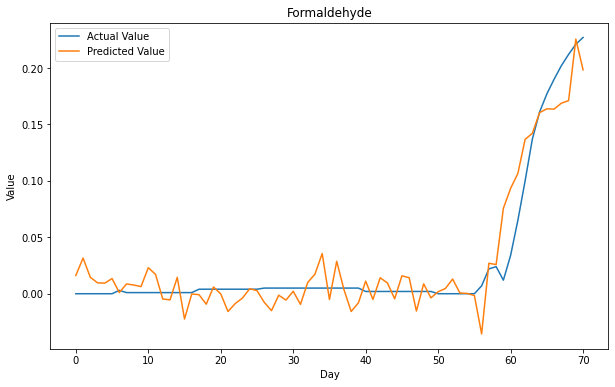

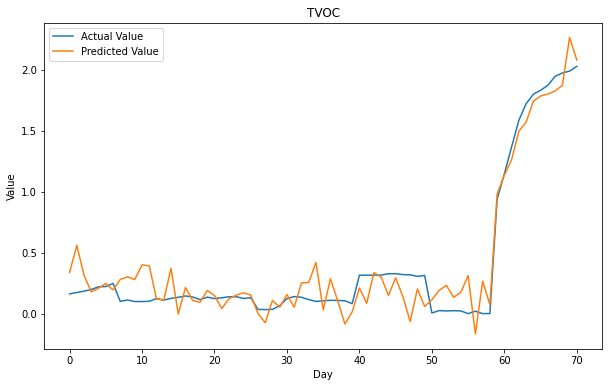

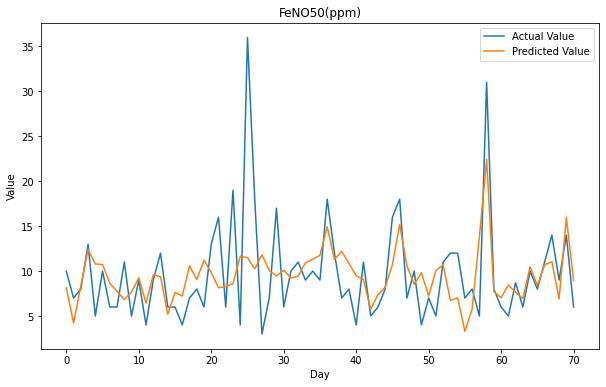

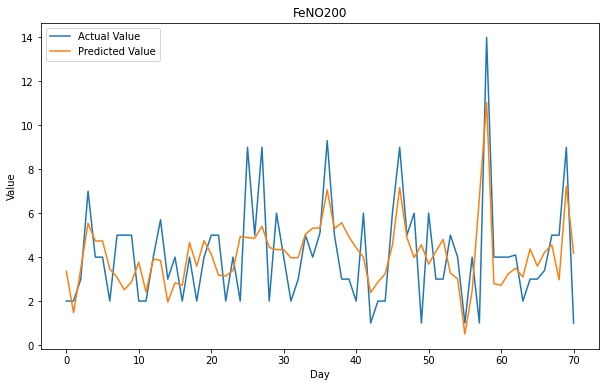

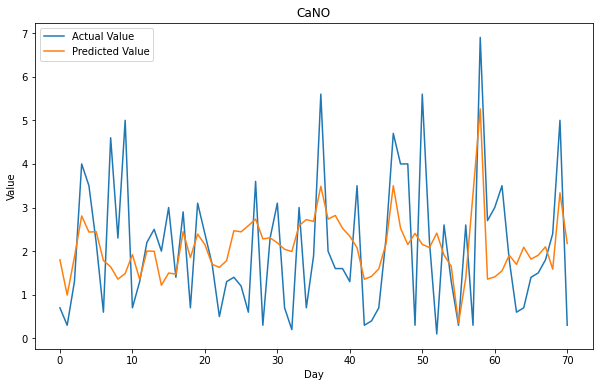

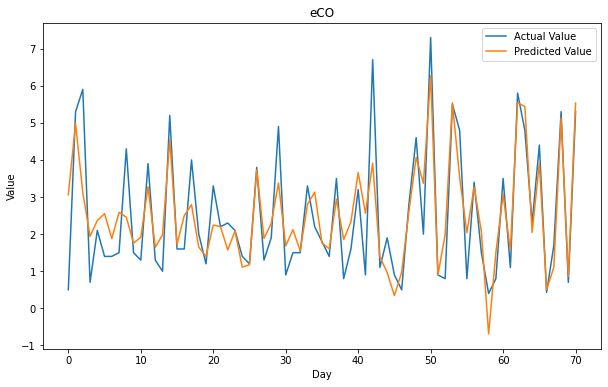

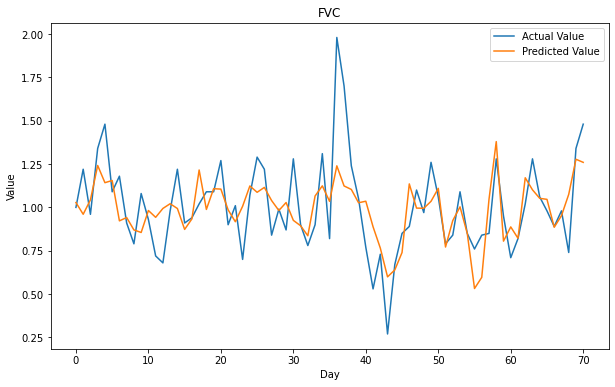

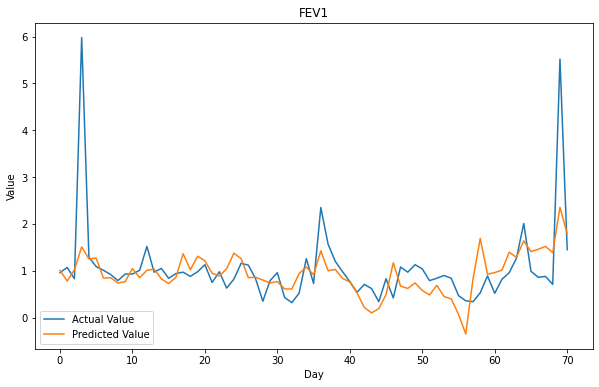

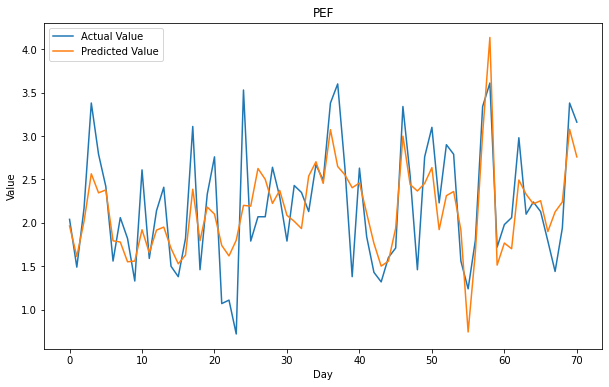

In [50]:
print(y_train.shape)
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()
    print(predicted.shape)

# Inverse transform the data
y_train_inverse = scaler.inverse_transform(y_train)
predicted_inverse = scaler.inverse_transform(predicted)

# Get the number of columns
num_cols = y_train.shape[1]

# Create a plot for each column
for col_index in range(num_cols):
    plt.figure(figsize=(10, 6))
    plt.plot(y_train_inverse[:,col_index], label='Actual Value')
    plt.plot(predicted_inverse[:,col_index], label='Predicted Value')
    plt.xlabel('Day')
    plt.ylabel('Value')
    plt.title(column_names_list[col_index])
    plt.legend()
    plt.show()

torch.Size([12, 15])
(12, 15)


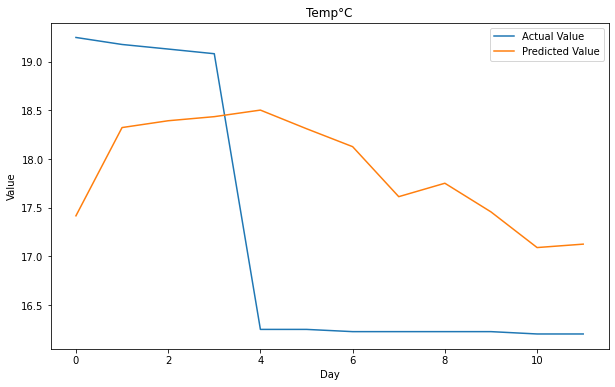

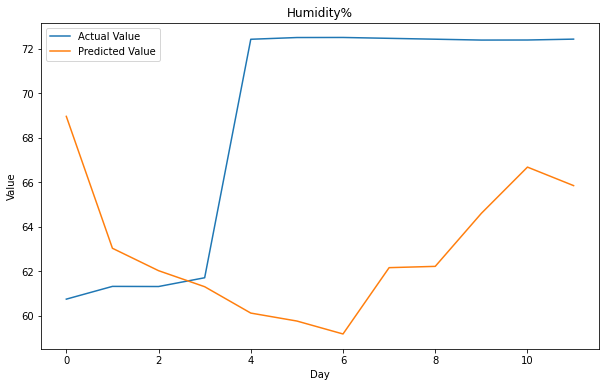

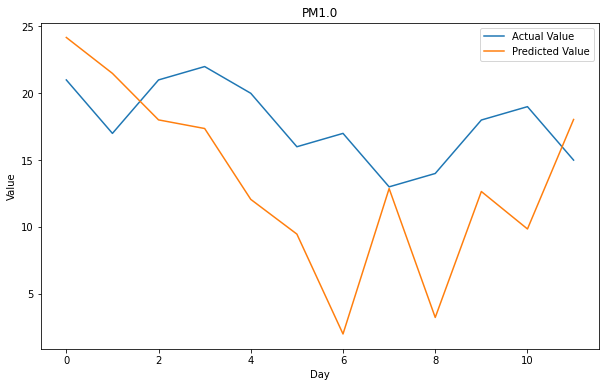

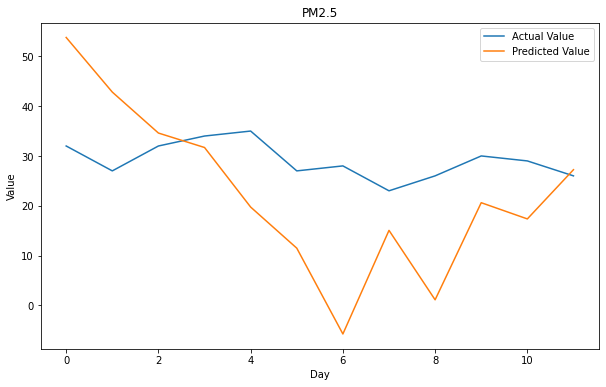

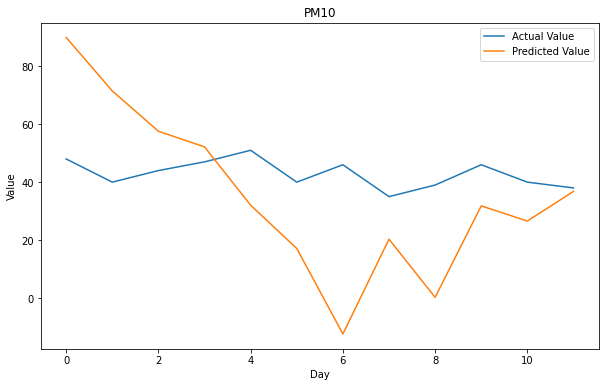

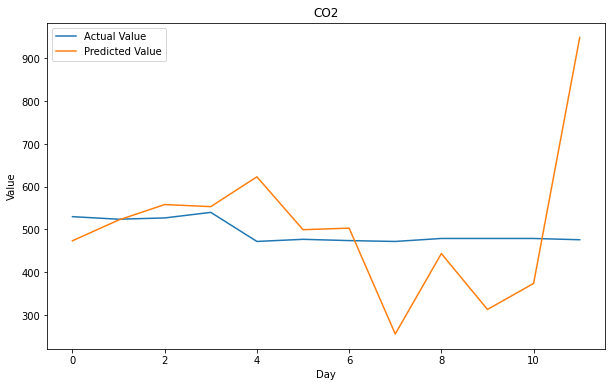

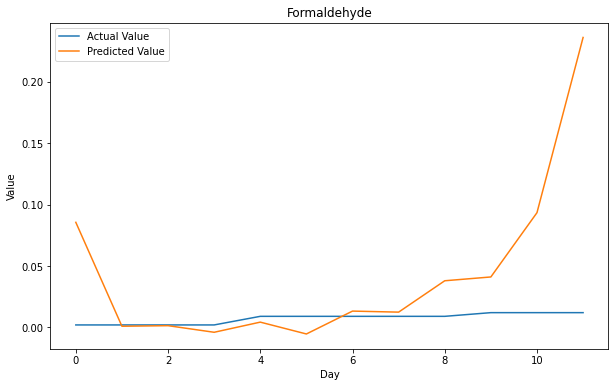

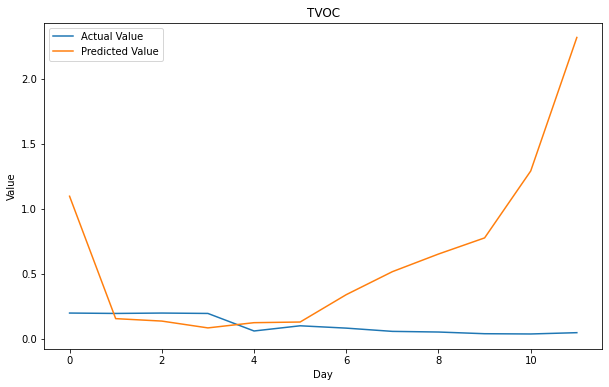

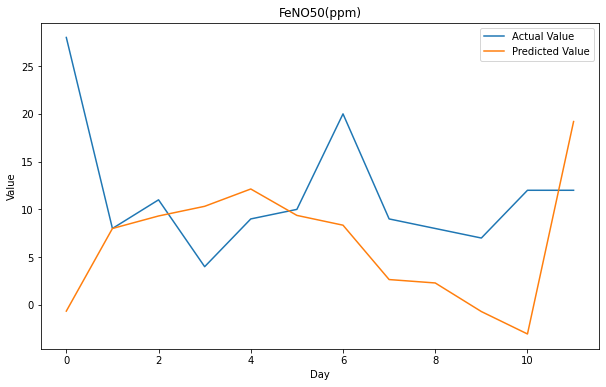

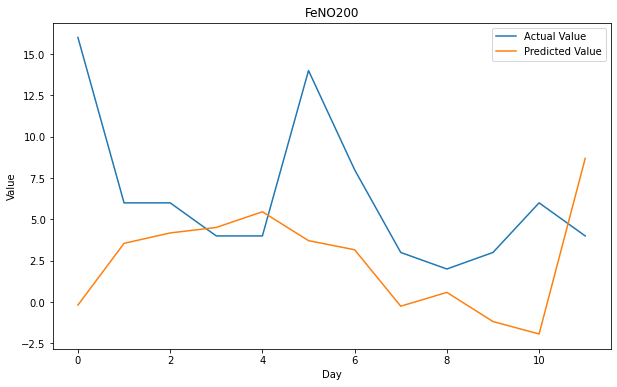

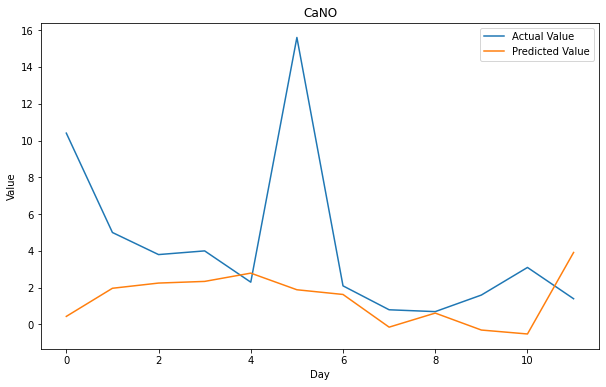

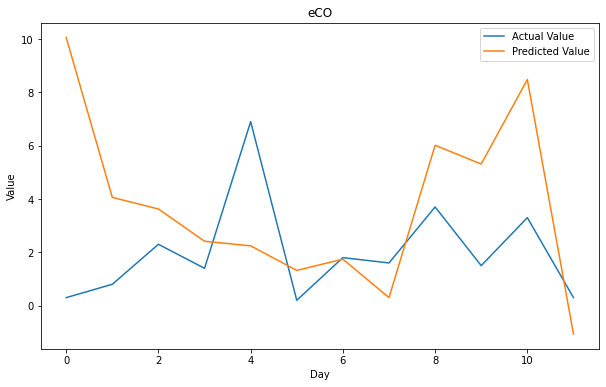

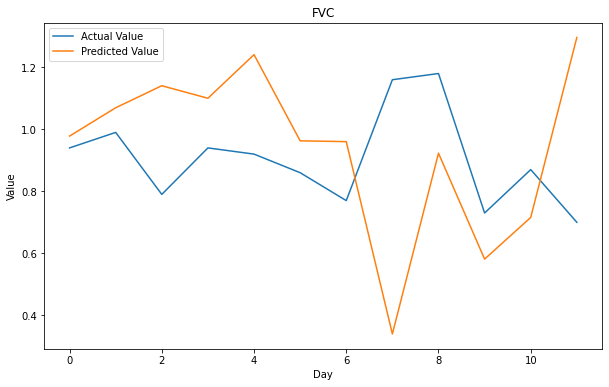

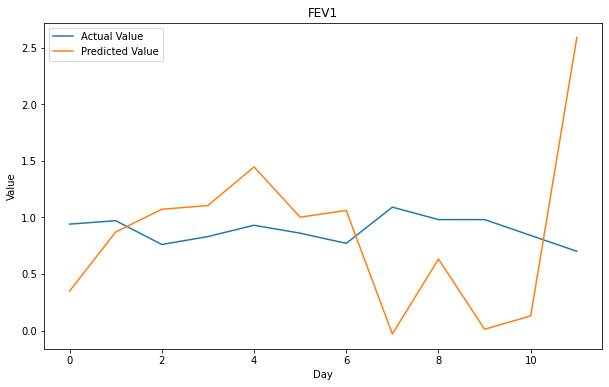

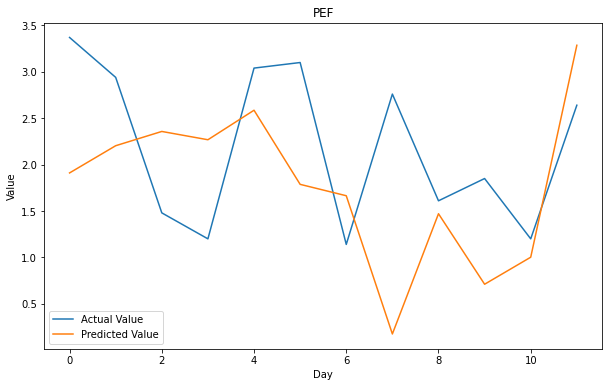

In [51]:
print(y_test.shape)
with torch.no_grad():
    predicted = model(X_test.to(device)).to('cpu').numpy()
    print(predicted.shape)

# Inverse transform the data
y_test_inverse = scaler.inverse_transform(y_test)
predicted_inverse = scaler.inverse_transform(predicted)

# Get the number of columns
num_cols = y_test.shape[1]

# Create a plot for each column
for col_index in range(num_cols):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inverse[:,col_index], label='Actual Value')
    plt.plot(predicted_inverse[:,col_index], label='Predicted Value')
    plt.xlabel('Day')
    plt.ylabel('Value')
    plt.title(column_names_list[col_index])
    plt.legend()
    plt.show()